In [15]:
#numpy,pandas,scipy, math, matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

# Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split





In [17]:
##################################################
##         Import and Prepare the Data          ##
##################################################

rawDefaultCredit= pd.read_csv('dataset/default of credit card clients.csv', header =1)

# Data and Text Cleaning

# ID: represents the number of the observation and has no value, needs to get removed
rawDefaultCredit= rawDefaultCredit.drop("ID", axis=1)

# PAY_0 should be renamed PAY_1
# (the inplace parameter will change the dataframe without assignment)
rawDefaultCredit.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

# Default Payment next month (not standard name needs to get renamed)
rawDefaultCredit.rename(columns={"default payment next month": "DEFAULT"}, inplace=True)

# Replace 4, 5, 6 to 0 to unify others to one unique value
rawDefaultCredit['EDUCATION'].replace([0, 5, 6], [4, 4, 4], inplace=True)

rawDefaultCredit.to_csv('dataset/defaultCreditCardClients.csv')

In [19]:
rawDefaultCredit.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
rawDefaultCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [44]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()



In [45]:
#features
features = rawDefaultCredit.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [65]:
#dependent variable
depVar = rawDefaultCredit['DEFAULT']

In [66]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [81]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [68]:
#5. Establish the testing set for the X-Variables or Feature space

#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29900          0          0          0          0          0         0   
29901      48750     103486      50590      50248      49387         0   
29902     168088     168955     161351     126198     124746    168096   
29903      17082      13333         99         99     172104     10018   
29904      56021      54126      58732      59306      59728      2600   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29900         0         0         0         0         0  
29901      6556      3250      1563      1208       781  
29902      6409      7335      4448      4519      5003  
29903     13333        99        99    172104     30013  
29904      4553      5800      2000      1000      1462  


In [69]:
#6. Establish Ground truth 

#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: DEFAULT, dtype: int64

In [70]:
#Training Data is divided into two parts: X-train and y_train
#Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape


((750, 11), (250, 11))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [72]:
model = LinearRegression(n_jobs=10)

In [73]:
model.fit(X_train,y_train)
modelRF.fit(X_train,y_train)
modelSVR.fit(X_train,y_train)
modelLR.fit(X_train,y_train)

LinearRegression()

In [74]:
#1. Random Forest Regression Model Fitting and Scoring

#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[-0.03390996 -0.10979832  0.00145384 -0.02845236 -0.08273839]


0.8100142271480026

In [75]:
#2.Support Vector Regression Model Fitting and Scoring

modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.03346167 -0.08830566 -0.11877205 -0.05304171 -0.00848689]


-0.005840136769416304

In [76]:
#3. Linear Regression Model Fitting and Scoring

modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[-0.10428345  0.00505626 -0.05804412 -0.01608521 -0.04586729]


0.02058924906730697

In [77]:
model.score(X_train,y_train)

0.02058924906730697

In [78]:
print(cross_val_score(modelRF, X_train, y_train)) 

[-0.05239864 -0.08472579 -0.00914807 -0.03818546 -0.1346687 ]


In [79]:
model.score(X_train,y_train)

0.02058924906730697

In [80]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [26]:
#4. Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [27]:
#5. Establish the testing set for the X-Variables or Feature space

#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29900          0          0          0          0          0         0   
29901      48750     103486      50590      50248      49387         0   
29902     168088     168955     161351     126198     124746    168096   
29903      17082      13333         99         99     172104     10018   
29904      56021      54126      58732      59306      59728      2600   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
29900         0         0         0         0         0  
29901      6556      3250      1563      1208       781  
29902      6409      7335      4448      4519      5003  
29903     13333        99        99    172104     30013  
29904      4553      5800      2000      1000      1462  


In [29]:
#6. Establish Ground truth 
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: DEFAULT, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [34]:
X_train.shape, X_test.shape

((421, 11), (141, 11))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((315, 11), (106, 11))

In [82]:
#Making Predictions
predictions = modelRF.predict(X_test)

In [83]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [84]:
predRsquared = r2_score(y_test,predictions)

In [85]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.048
RMSE: 0.446


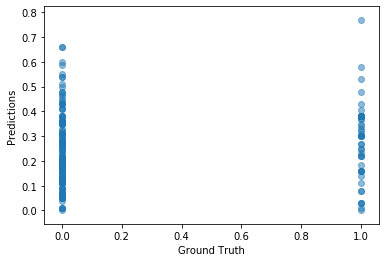

In [88]:
#Plotting the results
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [ ]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
#Gender (1 = male; 2 = female).
defaultCredit['SEX'] = defaultCredit['SEX'].astype('category')
#defaultCredit['SEX'].replace([1,2],['Male', 'Female'],inplace=True)

# Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
defaultCredit['EDUCATION'] = defaultCredit['EDUCATION'].astype('category')
#defaultCredit['EDUCATION'].replace([1,2,3, 4],['Graduate school', 'University', 'High school', 'Others'],inplace=True)

# 1 = married; 2 = single; 3 = divorce; 0=others
defaultCredit['MARRIAGE'] = defaultCredit['MARRIAGE'].astype('category')
#defaultCredit['MARRIAGE'].replace([1,2,3,0],['Married', 'Single', 'Divorce', 'Others'],inplace=True)

# The measurement scale for the repayment status is:
# -2: No consumption; 
#-1: Paid in full; 
# 0: The use of revolving credit; 
# 1 = payment delay for one month; 
# 2 = payment delay for two months; . . .; 
# 8 = payment delay for eight months; 
# 9 = payment delay for nine months and above.
defaultCredit['PAY_1'] = defaultCredit['PAY_1'].astype('category')
#defaultCredit['PAY_1'].replace([-2,-1,0,1,2,3,4,5,6,7,8],['NC', 'PF', 'RC', 'PD1M', 'PD2M', 'PD3M', 'PD4M', 'PD5M', 'PD6M','PD7M', 'PD8M'],inplace=True)

defaultCredit['PAY_2'] = defaultCredit['PAY_2'].astype('category')
#defaultCredit['PAY_2'].replace([-2,-1,0,1,2,3,4,5,6,7,8],['NC', 'PF', 'RC', 'PD1M', 'PD2M', 'PD3M', 'PD4M', 'PD5M', 'PD6M','PD7M', 'PD8M'],inplace=True)

defaultCredit['PAY_3'] = defaultCredit['PAY_3'].astype('category')
#defaultCredit['PAY_3'].replace([-2,-1,0,1,2,3,4,5,6,7,8],['NC', 'PF', 'RC', 'PD1M', 'PD2M', 'PD3M', 'PD4M', 'PD5M', 'PD6M','PD7M', 'PD8M'],inplace=True)

defaultCredit['PAY_4'] = defaultCredit['PAY_4'].astype('category')
#defaultCredit['PAY_4'].replace([-2,-1,0,1,2,3,4,5,6,7,8],['NC', 'PF', 'RC', 'PD1M', 'PD2M', 'PD3M', 'PD4M', 'PD5M', 'PD6M','PD7M', 'PD8M'],inplace=True)

defaultCredit['PAY_5'] = defaultCredit['PAY_5'].astype('category')
#defaultCredit['PAY_5'].replace([-2,-1,0,1,2,3,4,5,6,7,8],['NC', 'PF', 'RC', 'PD1M', 'PD2M', 'PD3M', 'PD4M', 'PD5M', 'PD6M','PD7M', 'PD8M'],inplace=True)

defaultCredit['PAY_6'] = defaultCredit['PAY_6'].astype('category')
#defaultCredit['PAY_6'].replace([-2,-1,0,1,2,3,4,5,6,7,8],['NC', 'PF', 'RC', 'PD1M', 'PD2M', 'PD3M', 'PD4M', 'PD5M', 'PD6M','PD7M', 'PD8M'],inplace=True)


# Y: client's behavior; Y=0 then not default, Y=1 then default"
defaultCredit['DEFAULT'] = defaultCredit['DEFAULT'].astype('category')
#defaultCredit['DEFAULT'].replace([0,1],['No default', 'Default'],inplace=True)

# Try to create a categorical value for AGE and LIMIT_BAL??
#
#defaultCredit.head()